# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [4]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

#Add the preprocessing library
from sklearn.preprocessing import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [40]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

training label shape: (2034L,)
test label shape: (677L,)
dev label shape: (676L,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

[2 pts]

In [17]:
#def P1(num_examples=5):

num_examples=5 
for i in range(0,num_examples):
    print newsgroups_train.target_names[train_labels[i]]
    print train_data[i]

    
### STUDENT START ###

### STUDENT END ###
#P1(2)

comp.graphics
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
talk.religion.misc


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.
sci.space

 >In article <199

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

[6 pts]

In [66]:
#def P2():
### STUDENT START ###
Cnt_Vect = CountVectorizer()

Token_Matrix = Cnt_Vect.fit_transform(train_data)


## 2a #####################################################################################
#What is the shape of the output matrix. ncol will be the size of the vocabulary
Vocab_Size = Token_Matrix.shape[1]
print "2a) Vocabulary Size = ", Vocab_Size

#To figure out the features per example, let's firt binarize the token matrix.
Token_Matrix_binary = binarize(Token_Matrix,threshold = 0)
#now sum across the columns and average across all the examples
Features_Per_Example = Token_Matrix_binary.sum(axis = 1)
print "Average number of non-zero features per example = ", np.mean(Features_Per_Example)

#calculate percent of non-zero values
Num_NonZero = Token_Matrix_binary.nnz
Total_Entris = Token_Matrix.shape[0]*Token_Matrix.shape[1]
Pct_NonZero = np.true_divide(Num_NonZero,Total_Entris)

print "Pct non-zero =", Pct_NonZero
###########################################################################################


## 2b #####################################################################################
#Get the feature names and store in an array

Feature_Names = Cnt_Vect.get_feature_names()
print "2b) 0th Feature = ", Feature_Names[0]
print "Last Feature = ", Feature_Names[len(Feature_Names)-1]
###########################################################################################


## 2c #####################################################################################
#define custom vocabulary 
Cnt_Vect_Custom_Vocab = CountVectorizer(vocabulary = ["atheism", "graphics", "space", "religion"])
Token_Matrix_Custom_Vocab = Cnt_Vect_Custom_Vocab.fit_transform(train_data)
print "2c) Token_Matrix_Custom_Vocab shape = ", Token_Matrix_Custom_Vocab.shape

Token_Matrix_Custom_Vocab_binary = binarize(Token_Matrix_Custom_Vocab,threshold = 0)
Features_Per_Example_Custom_Vocab = Token_Matrix_Custom_Vocab_binary.sum(axis = 1)
print "Average number of non-zero features per example for  [\"atheism\", \"graphics\", \"space\", \"religion\"]= ", np.mean(Features_Per_Example_Custom_Vocab)
###########################################################################################



## 2d #####################################################################################
Cnt_Vect_N_Gram = CountVectorizer(analyzer = 'word', ngram_range = (2,3))
Token_Matrix_N_Gram = Cnt_Vect_N_Gram.fit_transform(train_data)
print "2d) N_Gram vocab size = ",Token_Matrix_N_Gram.shape[1]
###########################################################################################



## 2e #####################################################################################
#Set cutoff so word must appear in at least 10 documents
#CountVectorizer takes a percentage so we need to figure out what this is.
Pct_Cutoff = np.true_divide(10,len(train_data))
Cnt_Vect = CountVectorizer(min_df = Pct_Cutoff)

Token_Matrix = Cnt_Vect.fit_transform(train_data)
print "2e) Pruned feature count (> 10 documents) = ", Token_Matrix.shape[1]

## 2f #####################################################################################
#combine the dev and training data and find the features in both
dev_AND_train_data = np.concatenate((train_data,dev_data),axis=0)
Cnt_Vect_Binary = CountVectorizer(binary = True)
Cnt_Vect_Binary.fit_transform(dev_AND_train_data)
Features_In_Both = Cnt_Vect_Binary.get_feature_names()
Num_Features_In_Both = len(Features_In_Both)

#Now that we've found the number of features in both. Subtract the number of features in the training data to get the answer. 
Num_Distinct_Dev_Features = Num_Features_In_Both - Vocab_Size
print "2f) Num Distinct Dev Data Features = ", Num_Distinct_Dev_Features
###########################################################################################

### STUDENT END ###
#P2()

2a) Vocabulary Size =  26879
Average number of non-zero features per example =  96.7059980334
Pct non-zero = 0.00359782722696
2b) 0th Feature =  00
Last Feature =  zyxel
2c) Token_Matrix_Custom_Vocab shape =  (2034, 4)
Average number of non-zero features per example for  ["atheism", "graphics", "space", "religion"]=  0.268436578171
2d) N_Gram vocab size =  510583
2e) Pruned feature count (> 10 documents) =  3064
2f) Num Distinct Dev Data Features =  4027


2a) The total vocabulary size is 26879. The average number of non-zero features per example is 96.7. The percent non-zero is 0.3%.

2b) 0th Feature =  00, Last Feature =  zyxel

2c) Average number of non-zero features per example for  ["atheism", "graphics", "space", "religion"]=  0.268436578171

2d) bigram and trigram vocab size =  510583

2e) Pruned feature count (> 10 documents, not include n-grams) =  3064

2f) Num Distinct Dev Data Features =  4027

(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

[4 pts]

KNN Highest F1 = 0.481933606631
Optimized K =  138


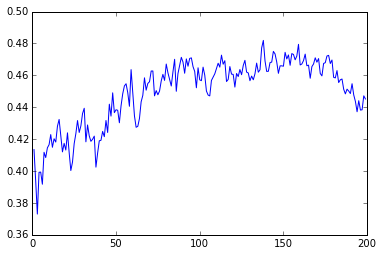

Multinomial NB Highest F1 = 0.785029608655
Optimized Aplha =  0.16


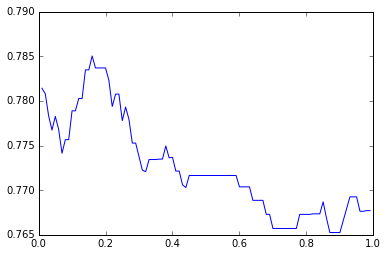

In [91]:
#def P3():
### STUDENT START ###
Cnt_Vect = CountVectorizer()

Token_Matrix = Cnt_Vect.fit_transform(train_data)
Token_Matrix_Test_Data = Cnt_Vect.transform(test_data)

#Optimize k in domain of 1,200
K = []
f1scores = []
highest_f1 = 0
Best_K = 1
for k in range(1,200):
    KNN = KNeighborsClassifier(n_neighbors = k)
    KNN.fit(Token_Matrix, train_labels)
    preds = KNN.predict(Token_Matrix_Test_Data)
    K.append(k)
    f1 = metrics.f1_score(test_labels,preds)
    f1scores.append(f1)
    if f1 > highest_f1:
        highest_f1 = f1
        Best_K = k
        
print "KNN Highest F1 =", highest_f1        
print "Optimized K = ", Best_K


#We've found our optimized k, but let's check the domain visually
#we need make sure the domain was was large enough to contain the actual optimized k
import matplotlib.pyplot as plt
plt.plot(K,f1scores)
plt.show()


Alphas = []
f1scores_NB = []
highest_f1_NB = 0
Best_Alpha = 0
for i in range(1,100,1):
    a = np.true_divide(i,100) #range function doesn't accept float values. Do this as a workaround
    Multi_NB = MultinomialNB(alpha = a, fit_prior = True)       
    Multi_NB.fit(Token_Matrix, train_labels)
    Predictions_Multi_NB = Multi_NB.predict(Token_Matrix_Test_Data)
    Alphas.append(a)
    f1 = metrics.f1_score(test_labels,Predictions_Multi_NB)
    f1scores_NB.append(f1)
    if f1 > highest_f1_NB:
        highest_f1_NB = f1
        Best_Alpha = a


print "Multinomial NB Highest F1 =", highest_f1_NB
print "Optimized Aplha = ", Best_Alpha
plt.plot(Alphas,f1scores_NB)
plt.show()


C_Values = []
f1scores_Logistic_Reg = []
highest_f1_Logistic_Reg = 0
Best_C = 0
for i in range(20,60,1):
    c = np.true_divide(i,100) #range function doesn't accept float values. Do this as a workaround
    Logistic_Reg = LogisticRegression(C = c, penalty = 'l2')       
    Logistic_Reg.fit(Token_Matrix, train_labels)
    Predictions_Logistic_Reg = Logistic_Reg.predict(Token_Matrix_Test_Data)
    C_Values.append(c)
    f1 = metrics.f1_score(test_labels,Predictions_Logistic_Reg)
    f1scores_Logistic_Reg.append(f1)
    if f1 > highest_f1_Logistic_Reg:
        highest_f1_Logistic_Reg = f1
        Best_C = c


print "Logistic Regression Highest F1 =", highest_f1_Logistic_Reg
print "Optimized C = ", Best_C
plt.plot(C_Values,f1scores_Logistic_Reg)
plt.show()
### STUDENT END ###
#P3()

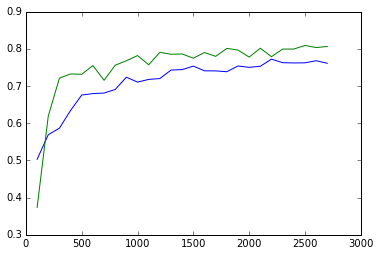

In [68]:
#to answer 3a, let's test the sample size effect on f1 for niave bayes and logistic regression using the optimized parameters
#since the hypothesis is that a larger sample size improves logistic regression, let's combine the dev data to get a bigger sample
dev_AND_train_data = np.concatenate((train_data,dev_data),axis=0)
dev_AND_train_labels = np.concatenate((train_labels,dev_labels),axis=0)
Cnt_Vect = CountVectorizer()
Token_Matrix = Cnt_Vect.fit_transform(dev_AND_train_data)
Token_Matrix_Test_Data = Cnt_Vect.transform(test_data)

Sample_Size = range(100,2800,100)
Log_Reg_f1 = []
NB_f1 = []
for i in Sample_Size:
    shuffle = np.random.choice(range(0,2710),size=i,replace=False)
    Token_Matrix_Sample = Token_Matrix[shuffle]
    train_labels_Sample = dev_AND_train_labels[shuffle]

    Logistic_Reg = LogisticRegression(C = .41, penalty = 'l2')       
    Logistic_Reg.fit(Token_Matrix_Sample, train_labels_Sample)
    Predictions_Logistic_Reg = Logistic_Reg.predict(Token_Matrix_Test_Data)
    
    Log_Reg_f1.append(metrics.f1_score(test_labels,Predictions_Logistic_Reg))
    
    Multi_NB = MultinomialNB(alpha = .16, fit_prior = True)       
    Multi_NB.fit(Token_Matrix_Sample, train_labels_Sample)
    Predictions_Multi_NB = Multi_NB.predict(Token_Matrix_Test_Data)
    
    NB_f1.append(metrics.f1_score(test_labels,Predictions_Multi_NB))

    
plt.plot(Sample_Size,Log_Reg_f1,label = "LogReg")
plt.plot(Sample_Size,NB_f1, label = "NB")
plt.show()    

In [119]:
#3c###
Cnt_Vect = CountVectorizer()

Token_Matrix = Cnt_Vect.fit_transform(train_data)
Token_Matrix_Test_Data = Cnt_Vect.transform(test_data)

Output = []
for i in range(5,100,5):
    c = np.true_divide(i,100) #range function doesn't accept float values. Do this as a workaround
    Logistic_Reg = LogisticRegression(C = c, penalty = 'l2')       
    Logistic_Reg.fit(Token_Matrix, train_labels)
    sum_sq = np.sum(Logistic_Reg.coef_**2,axis=1)
    Output.append(np.concatenate(([c],sum_sq),axis=1))

print Output

[array([  0.05      ,  14.07462552,  13.66910816,  14.60408357,  11.86068086]), array([  0.1       ,  27.13317322,  24.65147536,  27.45876821,  23.02521796]), array([  0.15      ,  38.91322035,  34.18674887,  38.90913543,  33.23261501]), array([  0.2       ,  49.74171945,  42.75513604,  49.32784792,  42.66783565]), array([  0.25      ,  59.83139706,  50.56776863,  58.94363673,  51.47944075]), array([  0.3       ,  69.30127386,  57.87915952,  67.90530902,  59.75403548]), array([  0.35      ,  78.24761296,  64.75441791,  76.30299237,  67.60813922]), array([  0.4       ,  86.74464777,  71.15990468,  84.26195842,  75.05766567]), array([  0.45      ,  94.82634992,  77.26267636,  91.8291428 ,  82.17929267]), array([   0.5       ,  102.62132909,   83.09150628,   98.98212943,
         89.01009227]), array([   0.55      ,  110.10515071,   88.66186068,  105.92983295,
         95.53067799]), array([   0.6       ,  117.26526278,   94.02284994,  112.51606756,
        101.91748326]), array([   0.65 

ANSWER:
KNN Highest F1 = 0.482
Optimized K =  138

Multinomial NB Highest F1 = 0.785
Optimized Aplha =  0.16

Logistic Regression Highest F1 = 0.749
Optimized C =  0.41

3a) K Nearest Neighbors doesn't work well for this problem because there are so many features. Multi-dimensional data is difficult for K-Nearest Neighbors. 

3b) It looks like there is a sample size effect in which naive bayes outperforms logistic regression with smaller training sample sizes. There also might be an effect with multi-colinearity since naive bayes assumes independence between the features.

3c) Larger sum of squares values can be a proxy for increased complexity since they indicate larger coefficients. Since c is the inverse of the regularization strength, you would expect a more complex model with a higher value of c. 

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

[5 pts]

In [142]:
#def P4():
### STUDENT START ###
Cnt_Vect = CountVectorizer()

Token_Matrix = Cnt_Vect.fit_transform(train_data)
Token_Matrix_Test_Data = Cnt_Vect.transform(test_data)

Logistic_Reg = LogisticRegression(C = .41, penalty = 'l2')       
Logistic_Reg.fit(Token_Matrix, train_labels)
Class0_Coef = Logistic_Reg.coef_[0]
Class1_Coef = Logistic_Reg.coef_[1]
Class2_Coef = Logistic_Reg.coef_[2]
Class3_Coef = Logistic_Reg.coef_[3]


Top5_Class0 = Class0_Coef.argsort()[-5:][::-1]
Top5_Class1 = Class1_Coef.argsort()[-5:][::-1]
Top5_Class2 = Class2_Coef.argsort()[-5:][::-1]
Top5_Class3 = Class3_Coef.argsort()[-5:][::-1]

Top5_AllClasses = list(np.concatenate((Top5_Class0,Top5_Class1,Top5_Class2,Top5_Class3),axis=1))

Features = np.array(Cnt_Vect.get_feature_names())

print Features[Top5_AllClasses]
print Logistic_Reg.coef_[0:4,Top5_AllClasses].T


#now do the same thing with bigrams 
Cnt_Vect = CountVectorizer(ngram_range=(2,2))

Token_Matrix = Cnt_Vect.fit_transform(train_data)
Token_Matrix_Test_Data = Cnt_Vect.transform(test_data)

Logistic_Reg = LogisticRegression(C = .41, penalty = 'l2')       
Logistic_Reg.fit(Token_Matrix, train_labels)
Class0_Coef = Logistic_Reg.coef_[0]
Class1_Coef = Logistic_Reg.coef_[1]
Class2_Coef = Logistic_Reg.coef_[2]
Class3_Coef = Logistic_Reg.coef_[3]


Top5_Class0 = Class0_Coef.argsort()[-5:][::-1]
Top5_Class1 = Class1_Coef.argsort()[-5:][::-1]
Top5_Class2 = Class2_Coef.argsort()[-5:][::-1]
Top5_Class3 = Class3_Coef.argsort()[-5:][::-1]

Top5_AllClasses = list(np.concatenate((Top5_Class0,Top5_Class1,Top5_Class2,Top5_Class3),axis=1))

Features = np.array(Cnt_Vect.get_feature_names())

print Features[Top5_AllClasses]
print Logistic_Reg.coef_[0:4,Top5_AllClasses].T

### STUDENT END ###

#P4()

[u'atheism' u'religion' u'bobby' u'atheists' u'islam' u'graphics' u'image'
 u'file' u'3d' u'computer' u'space' u'orbit' u'nasa' u'launch'
 u'spacecraft' u'christian' u'christians' u'blood' u'fbi' u'order']
[[ 0.57538547 -0.24731635 -0.24395558 -0.29806826]
 [ 0.57478613 -0.35338963 -0.46430594 -0.01168749]
 [ 0.57244397 -0.1409574  -0.20028193 -0.27137423]
 [ 0.55716481 -0.0849364  -0.18791848 -0.37658328]
 [ 0.4943534  -0.09129764 -0.19679466 -0.19808546]
 [-0.47240169  1.17227142 -0.76893344 -0.43760882]
 [-0.3151659   0.76929044 -0.44673538 -0.25824989]
 [-0.20138741  0.75242008 -0.49318261 -0.34398547]
 [-0.2153658   0.65627927 -0.3796059  -0.21899421]
 [-0.0180934   0.63965445 -0.39420881 -0.27168309]
 [-0.76439978 -0.82109334  1.42443038 -0.69001136]
 [-0.25364576 -0.39443931  0.70691418 -0.31192093]
 [-0.32131267 -0.30214411  0.62294106 -0.29476813]
 [-0.25263555 -0.2872748   0.56028642 -0.19931752]
 [-0.20660093 -0.22122448  0.47872716 -0.17652897]
 [-0.31563667 -0.22870942 -0.

ANSWER: I found it interesting the the bigram "cheers kent" had the highest weight for both the athiesm and religion classes. I also found it surprising that "islam" was highly weighted for athiesm but negatively weighted for religion. 

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

[4 pts]

In [65]:
import nltk
from nltk.stem import *

st = RegexpStemmer('ing$|s$', min=4) #use very basic regex stemming. Porter and lancaser stemmers made results worse

def LowerCase(matchobj):  
    return matchobj.group(0).lower()

def Stemmer(matchobj):
    return st.stem(matchobj.group(0))
        
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
    Processed = [None]*len(s)
    for i in range(0,len(s)):
        if s[i] == None:
            continue
        Processed[i] = re.sub('(?i)[a-z]+',Stemmer, s[i]) #Stem all the words
        Processed[i] = re.sub('[0-9]+',' NumberSequence ', Processed[i]) #Set any sequence of numbers to 'NumberSequence'
        Processed[i] = re.sub('\_','\s', Processed[i]) #remove underscores
        Processed[i] = re.sub('(?i)[a-z]+',LowerCase, Processed[i]) #Set all to lowercase
        #Processed[i] = re.sub('athiesm',' athiesm ', Processed[i]) #make sure important words aren't lost
        #Processed[i] = re.sub('athiest',' athiest ', Processed[i]) #make sure important words aren't lost
        #Processed[i] = re.sub('space',' space ', Processed[i]) #make sure important words aren't lost
        #Processed[i] = re.sub('christian',' christian ', Processed[i]) #make sure important words aren't lost
        #Processed[i] = re.sub('religion',' religion ', Processed[i]) #make sure important words aren't lost
        #Processed[i] = re.sub('islam',' islam ', Processed[i]) #make sure important words aren't lost
        #Processed[i] = re.sub('orbit',' orbit ', Processed[i]) #make sure important words aren't lost
        
        #Processed[i] = re.sub('[a-z]+@[a-z]+.[a-z]+','EmailAddress', Processed[i]) #make all email addresses the same
        #Processed[i] = re.sub('[a-z]+.com','WebAddress', Processed[i]) #make all web addresses the same
        #Processed[i] = re.sub('[a-z]+.[a-z]+','FileNameFileExtension', Processed[i]) #pull out file extensions

        #Processed[i] = re.sub('\.[a-z]+\s','FileExtension', Processed[i]) #Set all to lowercase
        
        #Processed[i] = re.sub('(?i)[^0-9a-z\s\n\t]+','', Processed[i]) #remove special characters and punctuation
        
    return Processed
### STUDENT START ###

Cnt_Vect = CountVectorizer()


Processed_train_data = better_preprocessor(train_data)
Processed_test_data = better_preprocessor(test_data)


Token_Matrix = Cnt_Vect.fit_transform(Processed_train_data)
Token_Matrix_Test_Data = Cnt_Vect.transform(Processed_test_data)


#use code from previous problem to find optimal c in range(40,50,1)
C_Values = []
f1scores_Logistic_Reg = []
highest_f1_Logistic_Reg = 0
Best_C = 0
for i in range(40,50,1):
    c = np.true_divide(i,100) #range function doesn't accept float values. Do this as a workaround
    Logistic_Reg = LogisticRegression(C = c, penalty = 'l2')       
    Logistic_Reg.fit(Token_Matrix, train_labels)
    Predictions_Logistic_Reg = Logistic_Reg.predict(Token_Matrix_Test_Data)
    C_Values.append(c)
    f1 = metrics.f1_score(test_labels,Predictions_Logistic_Reg)
    f1scores_Logistic_Reg.append(f1)
    if f1 > highest_f1_Logistic_Reg:
        highest_f1_Logistic_Reg = f1
        Best_C = c
print "previous baseline = .749 with 26879 features"
print highest_f1_Logistic_Reg
print len(Cnt_Vect.get_feature_names()), "total features"
### STUDENT END ###

#def P5():
### STUDENT START ###

    
### STUDENT END ###
#P5()

previous baseline = .749 with 26879 features
0.756454575397
21452 total features


previous baseline = .749 with 26879 features

f1 improves to 0.756 with 21452 total features

(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

For problem 6, c=[1000, 0.01] is recommended

[4 pts]

0.01
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1
10
100
1000


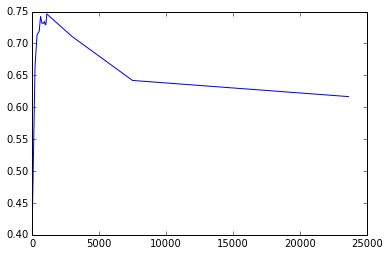

In [121]:

# Keep this random seed here to make comparison easier.
np.random.seed(0)

### STUDENT START ###
Cnt_Vect = CountVectorizer()

Token_Matrix = Cnt_Vect.fit_transform(train_data)
Token_Matrix_Test_Data = Cnt_Vect.transform(test_data)

C_Values = [.01]

C_Values.extend(np.true_divide(range(10,100,10),100))
C_Values.extend([1,2,3,4,5, 10, 100, 1000])



Vocab_Size = []
F1_Scores = []
for c in C_Values:
    print c
    Logistic_Reg = LogisticRegression(C = c, penalty = 'l1',tol=.01)       
    Logistic_Reg.fit(Token_Matrix, train_labels)


    Class0_Coef = Logistic_Reg.coef_[0]
    Class1_Coef = Logistic_Reg.coef_[1]
    Class2_Coef = Logistic_Reg.coef_[2]
    Class3_Coef = Logistic_Reg.coef_[3]

    Class0_Coef_non_zero = list(np.nonzero(Class0_Coef)[0])
    Class1_Coef_non_zero = list(np.nonzero(Class1_Coef)[0])
    Class2_Coef_non_zero = list(np.nonzero(Class2_Coef)[0])
    Class3_Coef_non_zero = list(np.nonzero(Class3_Coef)[0])


    All_Non_Zero = set(Class0_Coef_non_zero + Class1_Coef_non_zero + Class2_Coef_non_zero + Class3_Coef_non_zero)

    All_Non_Zero = list(All_Non_Zero)

    Logistic_Reg_Retrained = LogisticRegression(C = c, penalty = 'l2',tol=.01)       
    Logistic_Reg.fit(Token_Matrix[:,All_Non_Zero], train_labels)
    Predictions_Logistic_Reg = Logistic_Reg.predict(Token_Matrix_Test_Data[:,All_Non_Zero])
    
    Vocab_Size.append(len(All_Non_Zero))
    F1_Scores.append(metrics.f1_score(test_labels,Predictions_Logistic_Reg))
    #



plt.plot(Vocab_Size,F1_Scores)
plt.show()       
    
    ### STUDENT END ###
#P6()

6) There were 26879 non-zero weights with l2, but only 618 with l1. 

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

[4 pts]

In [134]:
#def P7():
    ### STUDENT START ###
Tfid_Vect = TfidfVectorizer()

Token_Matrix = Tfid_Vect.fit_transform(train_data)
Token_Matrix_Dev_Data = Tfid_Vect.transform(dev_data)

Logistic_Reg = LogisticRegression(C = 100, penalty = 'l2',tol=.01)       
Logistic_Reg.fit(Token_Matrix, train_labels)

Predictions_Logistic_Reg = Logistic_Reg.predict(Token_Matrix_Dev_Data)

Pred_Probs_Logistic_Reg = Logistic_Reg.predict_proba(Token_Matrix_Dev_Data)

Max_Pred_Prob = []
Correct_Label_Pred_Prob = []
for i in range(0,len(dev_labels)):
    Max_Pred_Prob.append(max(Pred_Probs_Logistic_Reg[i]))
    Correct_Label_Pred_Prob.append(Pred_Probs_Logistic_Reg[i][dev_labels[i]])
    

Ratio_R = np.true_divide(Max_Pred_Prob,Correct_Label_Pred_Prob)

Top3_Ratio_R = Ratio_R.argsort()[-3:][::-1]
    
for i in Top3_Ratio_R:
    newsgroups_train.target_names[train_labels[i]]
    print "Actual Label = ", newsgroups_train.target_names[dev_labels[i]]
    print "Predicted Label = ", newsgroups_train.target_names[Predictions_Logistic_Reg[i]]
    print dev_data[i]
    
    
    ### STUDENT END ###
#P7()

Actual Label =  talk.religion.misc
Predicted Label =  comp.graphics
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy center charges), but may not charge
anything for their time in making copies, or in any way realize a profit
from the use of this book. See the pe

ANSWER: TfidfVectorizer looks at how important a word is to a document in relation to the other documents in the corpus. 

Analyzing the entries with the highest F-Ratio, the main issue I see is talk.religion.misc being classified as comp.graphics because the discussion is around digital versions of the Book of Mormon. Seems like you could do some sort of sentiment analysis to get to what they are really talking about. You could also explore using n-grams to tease more information out. 

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

- [1 pt] for a reasonable attempt
- [2 pts] for improved performance

Baseline =  0.76745757333
Attempt #1 =  0.752644813658
Attempt #2 =  0.763745227141
Attempt #3 = 0.771864844806
Optimized C =  300


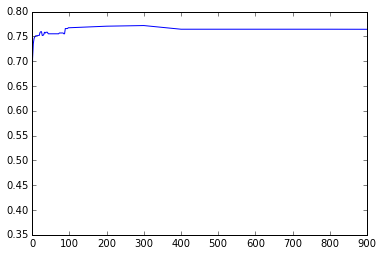

Attempt #4 = 0.775389309765
Optimized C =  137


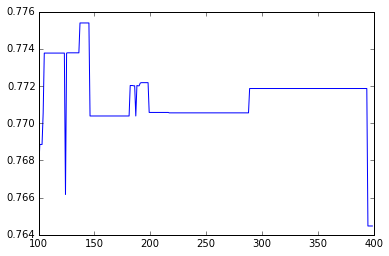

In [199]:
#First calculate a baseline 
Tfid_Vect = TfidfVectorizer()

Token_Matrix = Tfid_Vect.fit_transform(train_data)
Token_Matrix_Dev_Data = Tfid_Vect.transform(dev_data)

Logistic_Reg = LogisticRegression(C = 100, penalty = 'l2',tol=.01)       
Logistic_Reg.fit(Token_Matrix, train_labels)

Predictions_Logistic_Reg = Logistic_Reg.predict(Token_Matrix_Dev_Data)

print "Baseline = ", metrics.f1_score(dev_labels,Predictions_Logistic_Reg)


#First let's try adding some n-grams to 
Tfid_Vect = TfidfVectorizer(ngram_range =(1,3))

Token_Matrix = Tfid_Vect.fit_transform(train_data)
Token_Matrix_Dev_Data = Tfid_Vect.transform(dev_data)

Logistic_Reg = LogisticRegression(C = 100, penalty = 'l2',tol=.01)       
Logistic_Reg.fit(Token_Matrix, train_labels)

Predictions_Logistic_Reg = Logistic_Reg.predict(Token_Matrix_Dev_Data)

print "Attempt #1 = ", metrics.f1_score(dev_labels,Predictions_Logistic_Reg)

#Looks like adding any n grams makes performance worse...

#Now let's try pre-processing.
#This won't help the main problem, but should improve performance
Processed_train_data = better_preprocessor(train_data)
Processed_dev_data = better_preprocessor(dev_data)
Tfid_Vect = TfidfVectorizer()
Token_Matrix = Tfid_Vect.fit_transform(Processed_train_data)
Token_Matrix_Dev_Data = Tfid_Vect.transform(Processed_dev_data)

Logistic_Reg = LogisticRegression(C = 100, penalty = 'l2',tol=.01)       
Logistic_Reg.fit(Token_Matrix, train_labels)

Predictions_Logistic_Reg = Logistic_Reg.predict(Token_Matrix_Dev_Data)

print "Attempt #2 = ", metrics.f1_score(dev_labels,Predictions_Logistic_Reg)

#Again...worse. 

#let's just optimize for c and call it a day
Tfid_Vect = TfidfVectorizer()

Token_Matrix = Tfid_Vect.fit_transform(train_data)
Token_Matrix_Dev_Data = Tfid_Vect.transform(dev_data)

C_Values = []
f1scores_Logistic_Reg = []
highest_f1_Logistic_Reg = 0
Best_C = 0

C_Values.extend(np.true_divide(range(1,100,5),100))
C_Values.extend(range(1,100,2))
C_Values.extend(range(100,1000,100))

for c in C_Values:
    Logistic_Reg = LogisticRegression(C = c, penalty = 'l2',tol=.01)       
    Logistic_Reg.fit(Token_Matrix, train_labels)
    Predictions_Logistic_Reg = Logistic_Reg.predict(Token_Matrix_Dev_Data)
    f1 = metrics.f1_score(dev_labels,Predictions_Logistic_Reg)
    f1scores_Logistic_Reg.append(f1)
    if f1 > highest_f1_Logistic_Reg:
        highest_f1_Logistic_Reg = f1
        Best_C = c

        
        
# define an objective function
# def logistic_reg_f1(c,Token_Matrix,train_labels,Token_Matrix_Test_Data,test_labels):       
#     Logistic_Reg = LogisticRegression(C = c, penalty = 'l2',tol=.01)       
#     Logistic_Reg.fit(Token_Matrix, train_labels)
#     Predictions_Logistic_Reg = Logistic_Reg.predict(Token_Matrix_Test_Data)
#     f1 = metrics.f1_score(test_labels,Predictions_Logistic_Reg)
#     return -f1
 
# from scipy.optimize import minimize
# from scipy.optimize import optimize
# num = []
# Optim = minimize(logistic_reg_f1,1, args =(Token_Matrix,train_labels,Token_Matrix_Test_Data,test_labels)) #not working


#print logistic_reg_f1(.01)
print "Attempt #3 =", highest_f1_Logistic_Reg
print "Optimized C = ", Best_C
plt.plot(C_Values,f1scores_Logistic_Reg)
plt.show()



#reduce domain based on attempt #3
C_Values = []
f1scores_Logistic_Reg = []
highest_f1_Logistic_Reg = 0
Best_C = 0


C_Values.extend(range(100,400,1))
for c in C_Values:
    Logistic_Reg = LogisticRegression(C = c, penalty = 'l2',tol=.01)       
    Logistic_Reg.fit(Token_Matrix, train_labels)
    Predictions_Logistic_Reg = Logistic_Reg.predict(Token_Matrix_Dev_Data)
    f1 = metrics.f1_score(dev_labels,Predictions_Logistic_Reg)
    f1scores_Logistic_Reg.append(f1)
    if f1 > highest_f1_Logistic_Reg:
        highest_f1_Logistic_Reg = f1
        Best_C = c
print "Attempt #4 =", highest_f1_Logistic_Reg
print "Optimized C = ", Best_C
plt.plot(C_Values,f1scores_Logistic_Reg)
plt.show()